In [40]:
# type your code here
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import various functions from statsmodels
import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.graphics.gofplots import qqplot

# import 'stats'
from scipy import stats

# 'metrics' from sklearn is used for evaluating the model performance
from sklearn.metrics import mean_squared_error

# import functions to perform feature selection
from sklearn.feature_selection import SequentialFeatureSelector as sfs
from sklearn.feature_selection import RFE

# import function to perform linear regression
from sklearn.linear_model import LinearRegression

# import functions to perform cross validation
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [10]:
# load your data
# type your code here
df = pd.read_csv('winequality-white.csv',sep = ';')

# display first five observations using head()
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.000000,0.270000,0.360000,20.700000,0.045000,45.000000,170.000000,1.001000,3.000000,0.450000,8.800000,6
1,6.300000,0.300000,0.340000,1.600000,0.049000,14.000000,132.000000,0.994000,3.300000,0.490000,9.500000,6
2,8.100000,0.280000,0.400000,6.900000,0.050000,30.000000,97.000000,0.995100,3.260000,0.440000,10.100000,6
3,7.200000,0.230000,0.320000,8.500000,0.058000,47.000000,186.000000,0.995600,3.190000,0.400000,9.900000,6
4,7.200000,0.230000,0.320000,8.500000,0.058000,47.000000,186.000000,0.995600,3.190000,0.400000,9.900000,6


In [11]:
# check data types of variables
# type your code here
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

<bound method NDFrame._add_numeric_operations.<locals>.skew of 0      0.270000
1      0.300000
2      0.280000
3      0.230000
4      0.230000
5      0.280000
6      0.320000
7      0.270000
8      0.300000
9      0.220000
10     0.270000
11     0.230000
12     0.180000
13     0.160000
14     0.420000
15     0.170000
16     0.480000
17     0.660000
18     0.340000
19     0.310000
20     0.660000
21     0.310000
22     0.260000
23     0.670000
24     0.270000
25     0.250000
26     0.240000
27     0.280000
28     0.270000
29     0.320000
30     0.240000
31     0.140000
32     0.250000
33     0.120000
34     0.270000
35     0.280000
36     0.390000
37     0.330000
38     0.240000
39     0.240000
40     0.230000
41     0.240000
42     0.310000
43     0.240000
44     0.230000
45     0.180000
46     0.450000
47     0.460000
48     0.310000
49     0.190000
50     0.190000
51     0.250000
52     0.160000
53     0.180000
54     0.200000
55     0.250000
56     0.210000
57     0.190000
58     0.

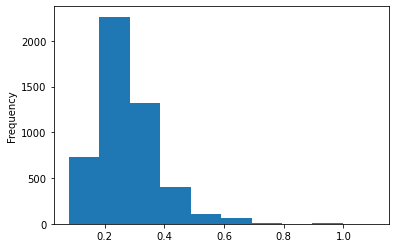

In [13]:
# type your code here
df['volatile acidity'].plot(kind = 'hist')
df['volatile acidity'].skew

AxesSubplot(0.125,0.125;0.775x0.755)


<bound method NDFrame._add_numeric_operations.<locals>.skew of 0      20.700000
1       1.600000
2       6.900000
3       8.500000
4       8.500000
5       6.900000
6       7.000000
7      20.700000
8       1.600000
9       1.500000
10      1.450000
11      4.200000
12      1.200000
13      1.500000
14     19.250000
15      1.500000
16      1.100000
17      1.200000
18      1.100000
19      7.500000
20      1.200000
21      2.900000
22      1.700000
23      1.500000
24      1.300000
25      9.000000
26      1.000000
27      8.700000
28      1.100000
29      2.000000
30     10.400000
31      1.100000
32      2.050000
33      1.500000
34     14.950000
35      1.700000
36      5.400000
37      1.200000
38     17.950000
39     17.950000
40      2.500000
41      2.900000
42      7.400000
43      1.400000
44      1.400000
45      1.400000
46      4.400000
47      4.400000
48      7.400000
49      5.000000
50      1.600000
51      1.100000
52      1.100000
53      1.000000
54      0.900000
55

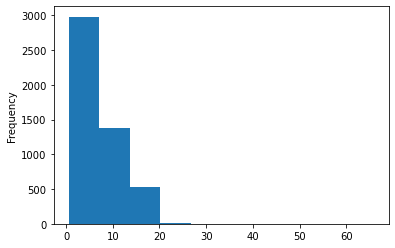

In [16]:
# type your code here
print(df['residual sugar'].plot(kind = 'hist'))
df['residual sugar'].skew


In [17]:
np.log(df['residual sugar']).skew()

-0.1611568975182972

In [18]:
np.sqrt(df['residual sugar']).skew()

0.31620347950253724

In [19]:
(1/df['residual sugar']).skew()

0.9806354970676121

In [27]:
def find_skew(col):
    print('no trans', df[col].skew())
    print('log' , np.log(df[col]).skew())
    print('sqrt', np.sqrt(df[col]).skew())
    print('resi', (1/df[col]).skew())
    

In [28]:
find_skew("alcohol")

no trans 0.4873419932161276
log 0.310134622964236
sqrt 0.39789094275901415
resi -0.13935230629934497


In [20]:
# type your code here
df.std()

fixed acidity           0.843868
volatile acidity        0.100795
citric acid             0.121020
residual sugar          5.072058
chlorides               0.021848
free sulfur dioxide    17.007137
total sulfur dioxide   42.498065
density                 0.002991
pH                      0.151001
sulphates               0.114126
alcohol                 1.230621
quality                 0.885639
dtype: float64

In [29]:
# type your code here
def find_skew(col):
    print('no trans', df[col].skew())
    print('log' , np.log(df[col]).skew())
    print('sqrt', np.sqrt(df[col]).skew())
    print('resi', (1/df[col]).skew())


In [30]:
find_skew("alcohol")

no trans 0.4873419932161276
log 0.310134622964236
sqrt 0.39789094275901415
resi -0.13935230629934497


In [32]:
# type your code here
from sklearn.linear_model import LinearRegression
mode = LinearRegression()
x = df.drop(['quality'],axis = 1)
y = df['quality']
mode.fit(x,y)
mode.score(x,y)


0.2818703641332867

In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df[['pH']])
x['pH'] = scaler.transform(x[['pH']])
mode.fit(x,y)
mode.score(x,y)


0.2818703641332865

In [ ]:
# type your code here


In [35]:
# type your code here
mode = LinearRegression()
x = df.drop(['quality'],axis = 1)
y = df['quality']
mode.fit(x,y)
mode.score(x,y)

0.2818703641332867

<AxesSubplot:xlabel='quality', ylabel='Count'>

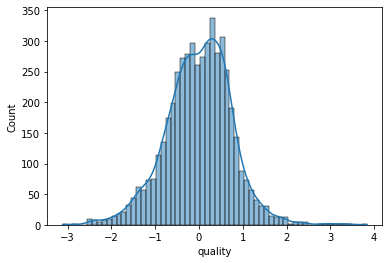

In [36]:
residual = mode.predict(x) - y
sns.histplot(residual,kde = True)

In [38]:
# type your code here
model = LinearRegression()
x["citric acid"] = np.sqrt(x['citric acid'])
model.fit(x,y)
model.score(x,y)

0.2821720894154851

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

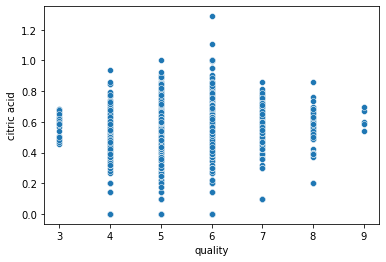

In [39]:
# type your code here
sns.scatterplot(x = df['quality'], y = np.sqrt(df['citric acid']))

In [42]:
# type your code here
model = LinearRegression()
x = df.drop(['quality'],axis = 1)
y = df['quality']
linreg = sfs(estimator=model, n_features_to_select= 5 ,direction='backward',scoring='r2')
sfs = linreg.fit(x,y)
